In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
path = 'crime_data_clean/crime_final_clean10_17.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.Date_Hour = pd.to_datetime(df.Date_Hour)
df = df.set_index('Date_Hour').sort_index(ascending=True)

In [6]:
df.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2010-01-01,10H10,500-599,EASTWOOD,Burglary,misc. business (non-specific),1,0,1,Friday,Jan,2010
2010-01-01,4F20,4800-4899,LAURELDALE,Aggravated Assault,residence/house,1,0,1,Friday,Jan,2010
2010-01-01,1A10,300-399,HAMILTON,Auto Theft,bar/night club parking lot,1,0,1,Friday,Jan,2010
2010-01-01,24C40,24000-24099,LAKE HOUSTON,Auto Theft,road/street/sidewalk,1,0,1,Friday,Jan,2010
2010-01-01,24C10,21700-21799,LAKEPOINT,Theft,residence/house,1,0,1,Friday,Jan,2010


# Drop block range, streetname, premise

In [9]:
print(list(df.columns))

['Beat', 'BlockRange', 'StreetName', 'OffenseType', 'Premise', 'NumOffenses', 'Hour', 'day', 'weekday', 'month', 'year']


In [15]:
df = df[['Beat', 'OffenseType']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003741 entries, 2010-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 2 columns):
Beat           1003741 non-null object
OffenseType    1003741 non-null object
dtypes: object(2)
memory usage: 23.0+ MB


In [22]:
df.columns = ['beat','ot']

In [23]:
data2 = pd.get_dummies(df, columns =['ot'])

In [28]:
#data2 = data2.drop('ot', axis=1)


In [30]:
data2.head()

,beat,ot_1,ot_Aggravated Assault,ot_Auto Theft,ot_Burglary,ot_Murder,ot_Rape,ot_Robbery,ot_Theft
Date_Hour,,,,,,,,,
2010-01-01,10H10,0,0,0,1,0,0,0,0
2010-01-01,4F20,0,1,0,0,0,0,0,0
2010-01-01,1A10,0,0,1,0,0,0,0,0
2010-01-01,24C40,0,0,1,0,0,0,0,0
2010-01-01,24C10,0,0,0,0,0,0,0,1


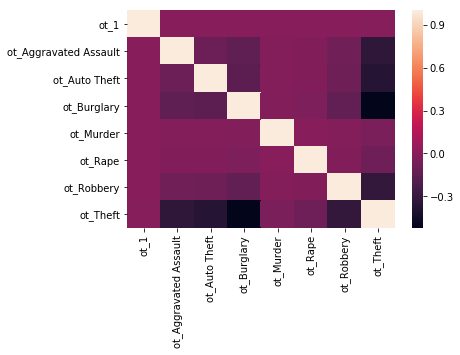

In [26]:
sns.heatmap(data2.corr())
plt.show()

In [38]:
data2['ot_Aggravated Assault'].value_counts()

0    920876
1     82865
Name: ot_Aggravated Assault, dtype: int64